# Image Processing with OpenCV

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

## Reading Images

We're going to be procesing a photograph of cultured HeLa cells. Fluorescent proteins have been targeted at the Golgi apparatus (orange), microtubules (green) and DNA (cyan). 

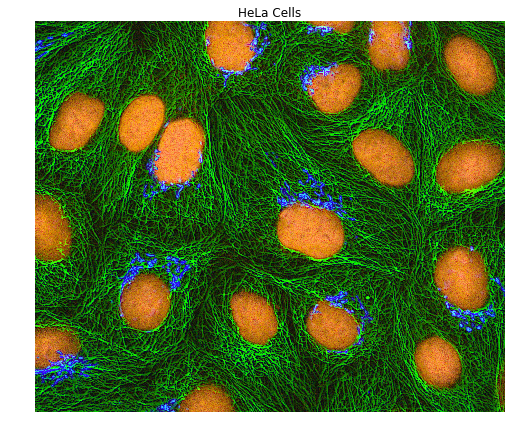

In [141]:
image = cv2.imread('images/hela.jpg', 1) # 0: grayscale, 1: color, -1: unchanged
plt.figure(figsize = (10, 7))
plt.title('HeLa Cells')
plt.axis('off')
plt.imshow(image)

## Image Properties

Can check size, shape, dimensions, increase contrast, brightness

(1999, 2400, 3)
uint8
[22 54 13]
54


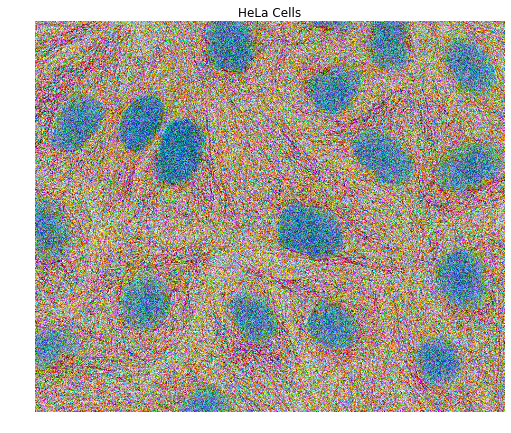

In [156]:
print (image.shape)
print (image.dtype)
print (image[55, 10]) # access pixel values by row and column
print (image[55, 10, 1]) # access green pixel
# image[55, 10] = [11, 55, 22] change pixel value
image_region = image[55:100,200:500]
bgr = cv2.split(image)
merged = cv2.merge((bgr))

increase_contrast = image * 3
decrease_contrast = image * 0.5
increase_brightness = image + 30
decrease_brightness = image - 30

plt.figure(figsize = (10, 7))
plt.title('HeLa Cells')
plt.axis('off')
plt.imshow(decrease_contrast)

## Colour Conversion

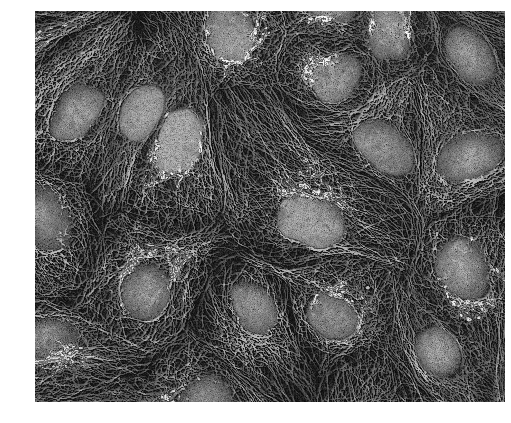

In [20]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # can also convert to other colorspaces

plt.figure(figsize = (10, 7))
plt.axis('off')
plt.imshow(gray_image, cmap = cm.Greys_r) # cm.Greys_r ensures image is displayed as grayscale

In [155]:
print (gray_image.shape)
print (gray_image.dtype)
print (gray_image[55, 10]) # access pixel values by row and column
# image[55, 10] = [11, 55, 22] change pixel value
image_region = gray_image[55:100,200:500]

(1999, 2400)
uint8
38


## Smoothing
More commonly know as applying a blur. Used to eliminate noise.

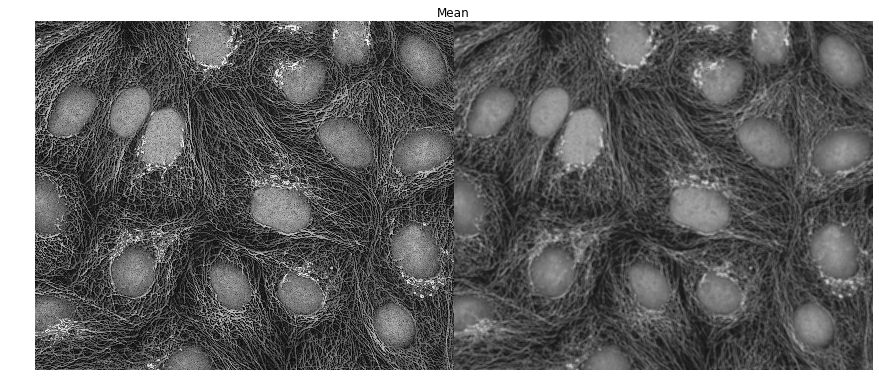

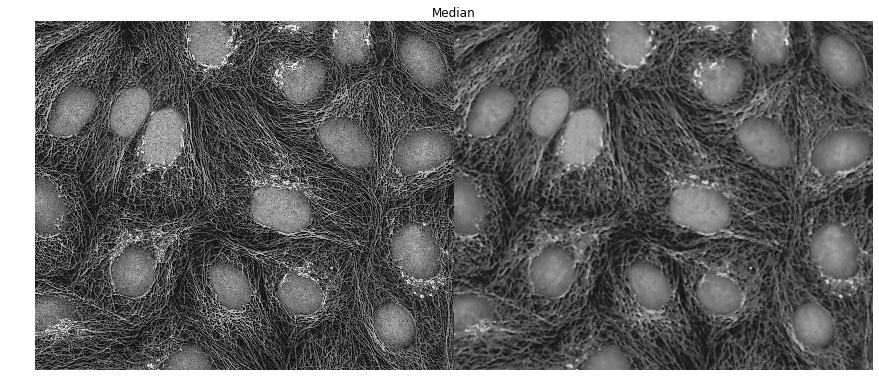

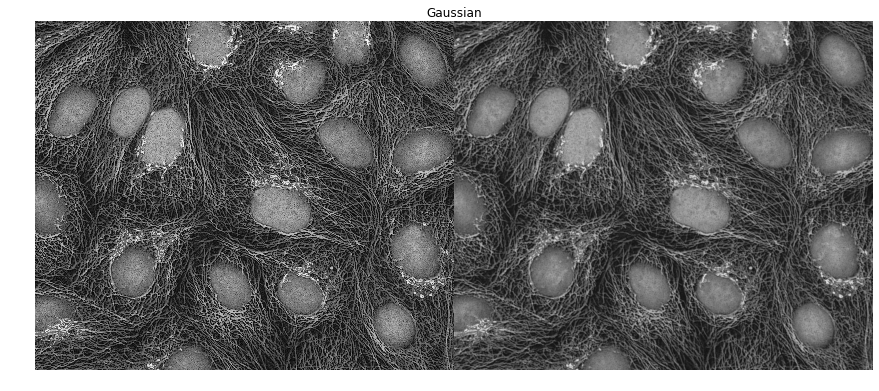

In [61]:
mean_smoothed = cv2.blur(gray_image, (15, 15))
median_smoothed = cv2.medianBlur(gray_image, 15)
gaussian_smoothed = cv2.GaussianBlur(gray_image, (15, 15), 0)

mean_compare = np.hstack((gray_image, mean_smoothed))
median_compare = np.hstack((gray_image, median_smoothed))
gaussian_compare = np.hstack((gray_image, gaussian_smoothed))

plt.figure(figsize = (15, 12))
plt.title('Mean')
plt.axis('off')
plt.imshow(mean_compare, cmap = cm.Greys_r) 

plt.figure(figsize = (15, 12))
plt.title('Median')
plt.axis('off')
plt.imshow(median_compare, cmap = cm.Greys_r)

plt.figure(figsize = (15, 12))
plt.title('Gaussian')
plt.axis('off')
plt.imshow(gaussian_compare, cmap = cm.Greys_r)

## Edge Detection
Purpose of line detection is to.. for grayscale images, some popular algorithms:
1. Laplacian
2. Canny
3. Sobel

### Laplacian

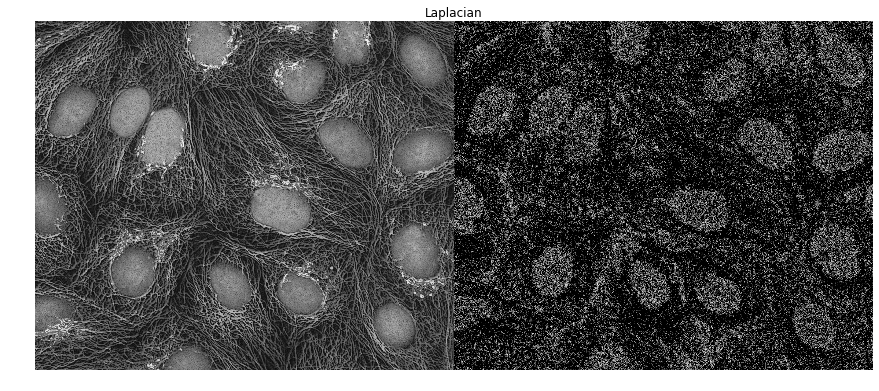

In [93]:
gaussian_smoothed = cv2.GaussianBlur(gray_image, (3, 3), 0)
laplacian = cv2.Laplacian(gaussian_smoothed, cv2.CV_64F, ksize = 17, scale = 1, delta = 1)

laplacian_compare = np.hstack((gaussian_smoothed, laplacian))
laplacian_compare = laplacian_compare.astype('uint8')

plt.figure(figsize = (15, 12))
plt.title('Laplacian')
plt.axis('off')
plt.imshow(laplacian_compare, cmap = cm.Greys_r)

### Canny


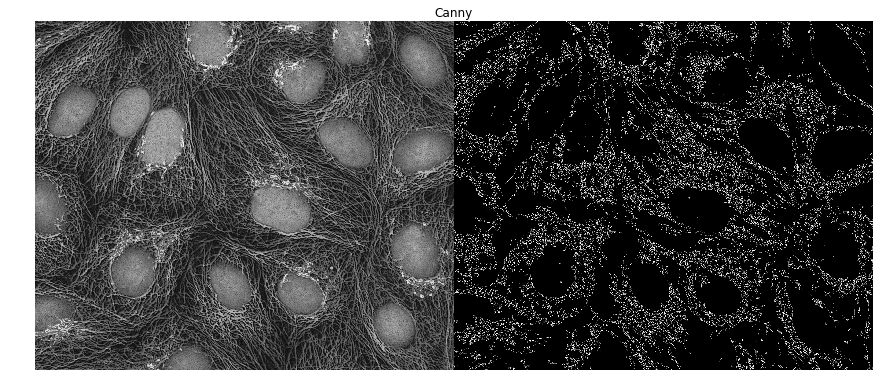

In [102]:
gaussian_smoothed = cv2.GaussianBlur(gray_image, (3, 3), 0)
canny = cv2.Canny(gaussian_smoothed, 100, 300)

canny_compare = np.hstack((gaussian_smoothed, canny))

plt.figure(figsize = (15, 12))
plt.title('Canny')
plt.axis('off')
plt.imshow(canny_compare, cmap = cm.Greys_r)

### Sobel


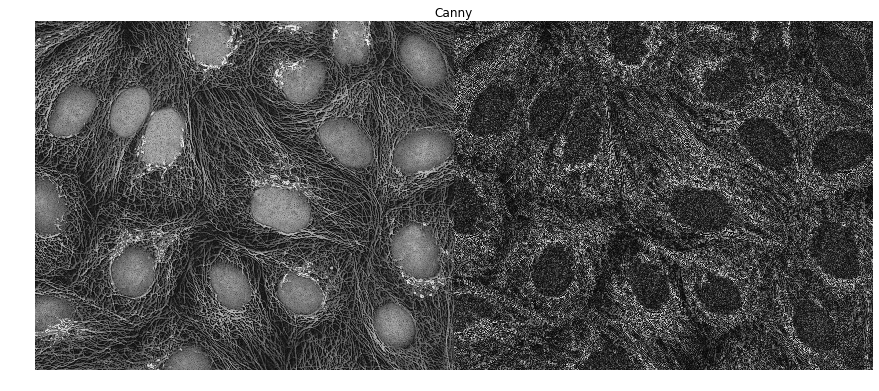

In [106]:
gaussian_smoothed = cv2.GaussianBlur(gray_image, (3, 3), 0)
sobel_x_gradient = cv2.Sobel(gaussian_smoothed, cv2.CV_64F, 1, 0, ksize=3)
sobel_y_gradient = cv2.Sobel(gaussian_smoothed, cv2.CV_64F, 0, 1, ksize=3)

# convert back to uint8 & merge
sobel_x_gradient_uint8 = cv2.convertScaleAbs(sobel_x_gradient)
sobel_y_gradient_uint8 = cv2.convertScaleAbs(sobel_y_gradient)
sobel = cv2.addWeighted(sobel_x_gradient_uint8, 0.5, sobel_y_gradient_uint8, 0.5, 0)

sobel_compare = np.hstack((gaussian_smoothed, sobel))

plt.figure(figsize = (15, 12))
plt.title('Canny')
plt.axis('off')
plt.imshow(sobel_compare, cmap = cm.Greys_r)

## Thresholding

Thresholding is...
Different types:
* THRESH_BINARY
* THRESH_BINARY_INV

Let's use the edges from the sobel detector

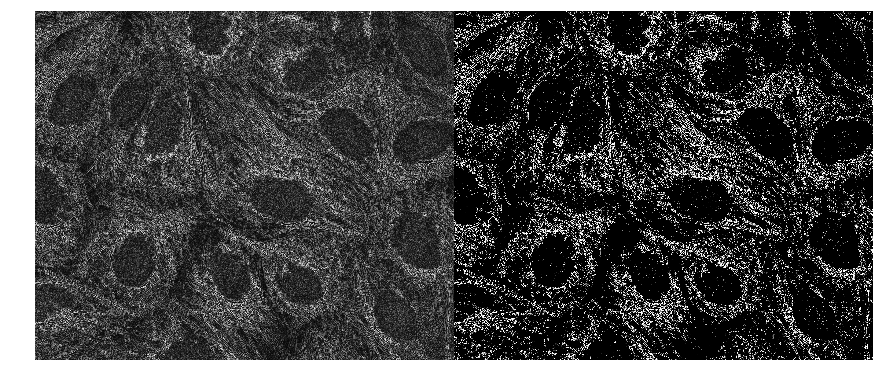

In [110]:
ret, thresh_sobel = cv2.threshold(sobel, 90, 255, cv2.THRESH_BINARY)

sobel_thresh_compare = np.hstack((sobel, thresh_sobel))

plt.figure(figsize = (15, 12))
plt.axis('off')
plt.imshow(sobel_thresh_compare, cmap = cm.Greys_r) 

## Finding Colours

Another way you can threshold is to look for the pixels of an image within a certain colour range

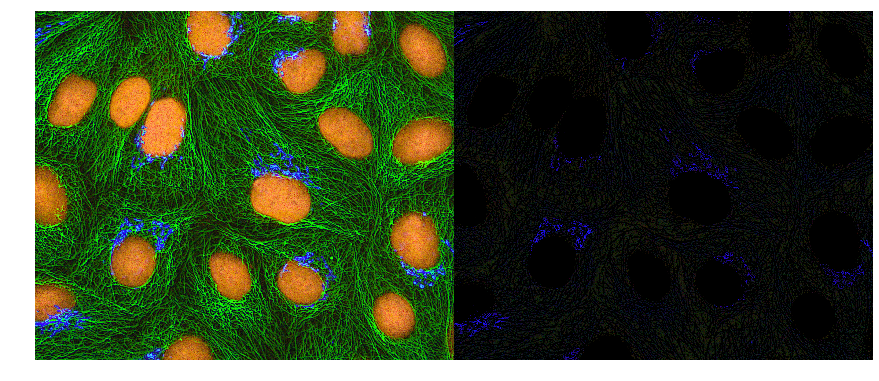

In [130]:
gaussian_image = cv2.GaussianBlur(image, (3, 3), 0)

blue_range = (np.array([0, 0, 0]), np.array([50, 50, 255]))
lower, upper = blue_range
image_mask = cv2.inRange(image, lower, upper)
colour_threshold = cv2.bitwise_and(image, image, mask = image_mask)

colour_threshold_compare = np.hstack((image, colour_threshold))

plt.figure(figsize = (15, 12))
plt.axis('off')
plt.imshow(colour_threshold_compare) 

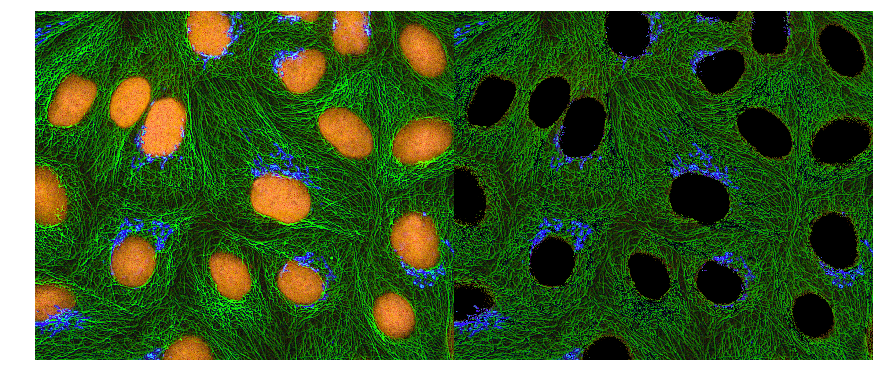

In [140]:
gaussian_image = cv2.GaussianBlur(image, (3, 3), 0)

blue_green = (np.array([0, 0, 0]), np.array([100, 200, 255]))
lower, upper = blue_green
image_mask = cv2.inRange(image, lower, upper)
colour_threshold = cv2.bitwise_and(image, image, mask = image_mask)

colour_threshold_compare = np.hstack((image, colour_threshold))

plt.figure(figsize = (15, 12))
plt.axis('off')
plt.imshow(colour_threshold_compare) 

## k means clustering